In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import pickle
from importlib import reload
import numpy as np
from hmmlearn.hmm import GaussianHMM

In [3]:
hmm_data = pickle.load(open(r'/Users/david/Documents/mastersCode/ubm/final/tests/synthetic_tests/unstructured_hmm_data.pkl', 'rb'))

In [4]:
curr_train = hmm_data['train_data'][0]

multiple sequences given


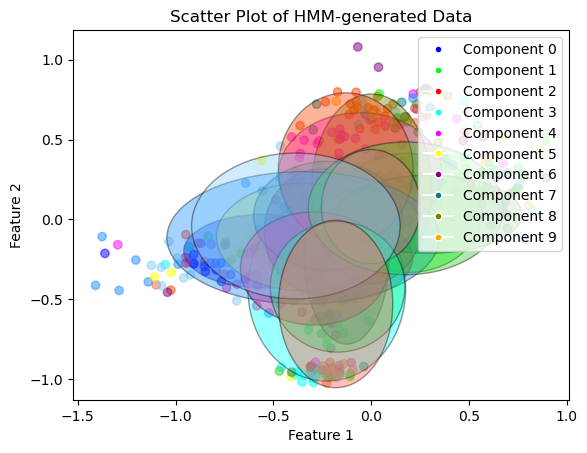

In [50]:
import final.models.hdphmm.bhmm.bhmm as bhmm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
reload(bhmm)
train = curr_train
my_bhmm = bhmm.BayesianHMM(X=train, K=20, iterations=5, alpha0=0.5, kappa0=10, outer_its=1000, verbose=False)
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_data(train[0], my_bhmm.Z, my_bhmm.K, my_bhmm.mu, my_bhmm.sigma, feature_a=0, feature_b=1)

In [51]:
hmm_from_trace = my_bhmm.fit()

starting gibbs sampling


KeyboardInterrupt: 

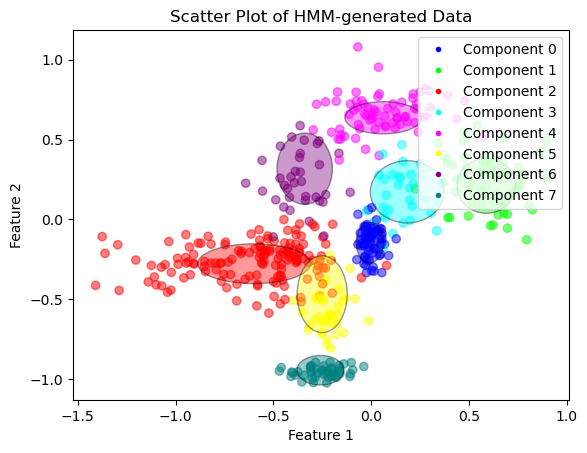

In [42]:
plot_hmm.plot_hmm_data(curr_train[0], hmm_from_trace.predict(curr_train[0]), hmm_from_trace.n_components, hmm_from_trace.means_, hmm_from_trace.covars_, feature_a=0, feature_b=1)

In [53]:
curr_test = hmm_data['test_data']
ns = np.arange(2,20,1)
n_inits = np.arange(0,4,1)

aic_em = []
bic_em = []
lls_em = []
lls_em_train = []
dict_results_em = {}
models = []
for n in ns:
    best_ll = None
    best_model = None
    print('calculating for n: ', n)
    for cv_index in range(len(hmm_data['train_data'])):
        for i in n_inits:
            curr_train = hmm_data['train_data'][cv_index]
            curr_val = hmm_data['val_data'][cv_index]
            my_bhmm = bhmm.BayesianHMM(X=curr_train, K=20, iterations=5, alpha0=0.5, kappa0=10, outer_its=1000, verbose=False)
            curr_hmm = my_bhmm.fit()
            score = curr_hmm.score(np.concatenate(curr_val))
            if not best_ll or score > best_ll:
                best_ll = score
                best_model = curr_hmm
    aic_em.append(best_model.aic(np.concatenate(curr_test)))
    bic_em.append(best_model.bic(np.concatenate(curr_test)))
    lls_em.append(best_model.score(np.concatenate(curr_test)))
    lls_em_train.append(best_model.score(np.concatenate(curr_test)))
    models.append(best_model)

calculating for n:  2
multiple sequences given
starting gibbs sampling
convergence criteria met!
Completed gibbs sampling -- Convergence:  True  -- In:  12.895204067230225
multiple sequences given
starting gibbs sampling
convergence criteria met!
Completed gibbs sampling -- Convergence:  True  -- In:  13.637111902236938
multiple sequences given
starting gibbs sampling


KeyboardInterrupt: 